In [1]:
from __future__ import print_function
import collections
import os
import string
import sklearn
from sklearn import datasets
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from itertools import islice
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# part 2:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.utils.extmath import density
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
import re
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from time import time
from sklearn.model_selection import GridSearchCV


In [2]:
# explore the dataset:

# <document,list of words>
documents = {}
# <cat,no.docs>
catDocs = {} 
# <cat,no.terms,frequency>
catTerms = {}
# document and its categories
dicCategory = {}
#data of the dataset
data = ''

In [3]:
def makeDataSet(path):
   dataSet=sklearn.datasets.load_files(path, description=None, categories=None, load_content=True, shuffle=True, encoding=None, random_state=0)
   data = dataSet.data
   return dataSet

dataSet = makeDataSet("C:\\Users\\Estif\\Downloads\\ohsumed-first-20000-docs.tar\\ohsumed-first-20000-docs"
            "\\training")
data_test = makeDataSet("C:\\Users\\Estif\\Downloads\\ohsumed-first-20000-docs.tar\\ohsumed-first-20000-docs"
            "\\test")


In [4]:
# merge 2 dictionaries
def mergeDicts(dic1, dic2):
    input = [dic1, dic2]
    return sum((Counter(dict(x)) for x in input), Counter())

# count dictionary's words frequency
def makeFrequencyDic(words):
    wordFreq=[words.count(p) for p in words]
    return dict(zip(words,wordFreq))

# update frequency for categories
def updateCategories(categories,words):
    wordsFreq= makeFrequencyDic(words)
    for category in categories:
        if category in catTerms:
            frequencyDic=catTerms[category]
            mergedDic=mergeDicts(frequencyDic,wordsFreq)
            catTerms[category]=mergedDic
        else:
            catTerms[category]=wordsFreq
            
# sort frequency dic in descending order
def sortFreqDict(freqdict):
    sorted = [(freqdict[key], key) for key in freqdict]
    sorted.sort()
    sorted.reverse()
    return sorted

# "Return first n items of the iterable as a list"
def take(n, iterable):
    return list(islice(iterable, n))


In [5]:
def cleanData(dataSet):
   counter = 0
   for file in dataSet.filenames:
       data = dataSet.data[counter]
       category = os.path.basename(os.path.dirname(file))
       fileName = os.path.basename(file)
       documents[fileName] = word_tokenize(data.decode("utf-8"))
       counter = counter+1
       # <category, num of docs>
       if category in catDocs:
           catDocs[category] = catDocs[category] +1
       else:
           catDocs[category] = 1
           # <doc,list of categories>
       if fileName not in dicCategory:
           dicCategory[fileName] = []
           dicCategory[fileName].append(category)
       else:
           dicCategory[fileName].append(category)
   # stop words filtration ,lowercase and stemmig
   stop_words = stopwords.words('english')
   moreStopWords=['p', '+/-', '-/+']
   stop_words += set(string.punctuation)
   stop_words.extend(moreStopWords)
   #stem


   for key, value in documents.items():
       words = documents[key]
       ps = PorterStemmer()
       #filtered_sentence = [w for w in words if not w in stop_words]
       filtered_sentence = []
       for w in words:
           w = w.lower()
           if w not in stop_words:
               if len(w)>1:
                   try:
                       filtered_sentence.append(ps.stem(w))
                   except Exception as inst:
                       filtered_sentence.append(w)
       documents[key] = filtered_sentence
       updateCategories(dicCategory[key],filtered_sentence)


In [6]:
from IPython.display import display
def makeTables(dataSet):
    
    numCat = len(dataSet.target_names)
    # print number of categories
    print('Number of categories', numCat)
    # make categories and number of docs for each of them table
    sortedCategories=collections.OrderedDict(sorted(catDocs.items()))
    categoriesArr=[]
    for category, numFiles in sortedCategories.items():
        categoriesArr.append([category,numFiles])

    categorisDocumentsDF=pd.DataFrame(categoriesArr, columns=['Category', 'NumberOfFiles'])
    display(categorisDocumentsDF)


    # make frequencies table
    categoriesArr=[]
    lineArr=[]
    for category, freqDic in catTerms.items():
        lineArr=[]
        lineArr.append(category)
        freqDic=sortFreqDict(freqDic) #sort dic by frequency
        top10 = dict((val, key) for (key, val) in freqDic)
        # print(top10)
        top10 = dict(take(10, top10.items()))

        wordsLine=[]
        for word,freq in top10.items():
            termAndfreq=[word,freq]
            lineArr.append(termAndfreq)
            wordsLine.append(termAndfreq)
        
        categoryPlot = pd.DataFrame(wordsLine, columns = ['Word', 'Count'])    
        ax = categoryPlot.plot.bar(title ="10 most frequent terms in category: " + category, x='Word',y='Count')

        categoriesArr.append(lineArr)
        
        x_offset = -0.4
        y_offset = 2
        for p in ax.patches:
          b = p.get_bbox()
          val = b.y1 + b.y0    
          ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
        
        

    termsFreqDF=pd.DataFrame(categoriesArr, columns=['Category','term 1','term 2','term 3','term 4','term 5','term 6','term 7','term 8','term 9','term 10'])
    display(termsFreqDF)
    df2 = pd.DataFrame(termsFreqDF)
    df2.transpose()
    df2.style
    print(df2)


Number of categories 23


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Category</th>
      <th>NumberOfFiles</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>C01</td>
      <td>423</td>
    </tr>
    <tr>
      <th>1</th>
      <td>C02</td>
      <td>158</td>
    </tr>
    <tr>
      <th>2</th>
      <td>C03</td>
      <td>65</td>
    </tr>
    <tr>
      <th>3</th>
      <td>C04</td>
      <td>1163</td>
    </tr>
    <tr>
      <th>4</th>
      <td>C05</td>
      <td>283</td>
    </tr>
    <tr>
      <th>5</th>
      <td>C06</td>
      <td>588</td>
    </tr>
    <tr>
      <th>6</th>
      <td>C07</td>
      <td>100</td>
    </tr>
    <tr>
      <th>7</th>
      <td>C08</td>
      <td>473</td>
    </tr>
    <tr>
      <th>8</th>
      <td>C09</td>
      <td>125</td>
    </tr>
    <tr>
      <th>9</th>
      <td>C10</td>
      <td>621</td>
    </tr>
    <tr>
      <th>10</th>
      <td>C11</td>
      <td>162</td>
    </tr>
    <tr>
      <th>11</th>
      <td>C12</td>
      <td>491</td>
    </tr>
    <tr>
      <th>12</th>
      <td>C13</td>
      <td>281</td>
    </tr>
    <tr>
      <th>13</th>
      <td>C14</td>
      <td>1249</td>
    </tr>
    <tr>
      <th>14</th>
      <td>C15</td>
      <td>215</td>
    </tr>
    <tr>
      <th>15</th>
      <td>C16</td>
      <td>200</td>
    </tr>
    <tr>
      <th>16</th>
      <td>C17</td>
      <td>295</td>
    </tr>
    <tr>
      <th>17</th>
      <td>C18</td>
      <td>388</td>
    </tr>
    <tr>
      <th>18</th>
      <td>C19</td>
      <td>191</td>
    </tr>
    <tr>
      <th>19</th>
      <td>C20</td>
      <td>525</td>
    </tr>
    <tr>
      <th>20</th>
      <td>C21</td>
      <td>546</td>
    </tr>
    <tr>
      <th>21</th>
      <td>C22</td>
      <td>92</td>
    </tr>
    <tr>
      <th>22</th>
      <td>C23</td>
      <td>1799</td>
    </tr>
  </tbody>
</table>
</div>

C:\Users\Estif\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Category</th>
      <th>term 1</th>
      <th>term 2</th>
      <th>term 3</th>
      <th>term 4</th>
      <th>term 5</th>
      <th>term 6</th>
      <th>term 7</th>
      <th>term 8</th>
      <th>term 9</th>
      <th>term 10</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>C19</td>
      <td>[patient, 568]</td>
      <td>[diabet, 264]</td>
      <td>[level, 155]</td>
      <td>[thyroid, 148]</td>
      <td>[studi, 146]</td>
      <td>[less, 146]</td>
      <td>[glucos, 136]</td>
      <td>[diseas, 123]</td>
      <td>[subject, 107]</td>
      <td>[insulin, 102]</td>
    </tr>
    <tr>
      <th>1</th>
      <td>C04</td>
      <td>[patient, 2886]</td>
      <td>[cell, 1614]</td>
      <td>[tumor, 1450]</td>
      <td>[cancer, 1000]</td>
      <td>[carcinoma, 904]</td>
      <td>[case, 700]</td>
      <td>[studi, 695]</td>
      <td>[use, 619]</td>
      <td>[treatment, 566]</td>
      <td>[diseas, 550]</td>
    </tr>
    <tr>
      <th>2</th>
      <td>C20</td>
      <td>[patient, 1275]</td>
      <td>[infect, 601]</td>
      <td>[cell, 552]</td>
      <td>[diseas, 388]</td>
      <td>[hiv, 360]</td>
      <td>[studi, 345]</td>
      <td>[human, 328]</td>
      <td>[use, 310]</td>
      <td>[immunodefici, 306]</td>
      <td>[aid, 289]</td>
    </tr>
    <tr>
      <th>3</th>
      <td>C23</td>
      <td>[patient, 4887]</td>
      <td>[group, 1207]</td>
      <td>[studi, 1043]</td>
      <td>[use, 1019]</td>
      <td>[less, 861]</td>
      <td>[case, 830]</td>
      <td>[diseas, 789]</td>
      <td>[result, 781]</td>
      <td>[effect, 710]</td>
      <td>[year, 688]</td>
    </tr>
    <tr>
      <th>4</th>
      <td>C08</td>
      <td>[patient, 1172]</td>
      <td>[lung, 465]</td>
      <td>[pulmonari, 420]</td>
      <td>[group, 314]</td>
      <td>[studi, 297]</td>
      <td>[diseas, 289]</td>
      <td>[less, 264]</td>
      <td>[use, 250]</td>
      <td>[increas, 247]</td>
      <td>[respiratori, 234]</td>
    </tr>
    <tr>
      <th>5</th>
      <td>C14</td>
      <td>[patient, 3831]</td>
      <td>[arteri, 1273]</td>
      <td>[group, 1096]</td>
      <td>[coronari, 1053]</td>
      <td>[less, 1039]</td>
      <td>[ventricular, 898]</td>
      <td>[studi, 876]</td>
      <td>[heart, 874]</td>
      <td>[pressur, 825]</td>
      <td>[use, 818]</td>
    </tr>
    <tr>
      <th>6</th>
      <td>C21</td>
      <td>[patient, 1083]</td>
      <td>[injuri, 589]</td>
      <td>[use, 375]</td>
      <td>[alcohol, 346]</td>
      <td>[studi, 330]</td>
      <td>[result, 264]</td>
      <td>[fractur, 245]</td>
      <td>[case, 242]</td>
      <td>[effect, 220]</td>
      <td>[trauma, 217]</td>
    </tr>
    <tr>
      <th>7</th>
      <td>C07</td>
      <td>[patient, 151]</td>
      <td>[cell, 64]</td>
      <td>[periodont, 59]</td>
      <td>[treatment, 57]</td>
      <td>[case, 55]</td>
      <td>[use, 47]</td>
      <td>[tumor, 47]</td>
      <td>[diseas, 43]</td>
      <td>[studi, 40]</td>
      <td>[primari, 40]</td>
    </tr>
    <tr>
      <th>8</th>
      <td>C02</td>
      <td>[patient, 287]</td>
      <td>[infect, 274]</td>
      <td>[viru, 180]</td>
      <td>[human, 139]</td>
      <td>[cell, 113]</td>
      <td>[immunodefici, 101]</td>
      <td>[diseas, 98]</td>
      <td>[studi, 88]</td>
      <td>[hiv, 87]</td>
      <td>[case, 83]</td>
    </tr>
    <tr>
      <th>9</th>
      <td>C10</td>
      <td>[patient, 1531]</td>
      <td>[studi, 396]</td>
      <td>[group, 371]</td>
      <td>[use, 324]</td>
      <td>[pain, 270]</td>
      <td>[diseas, 264]</td>
      <td>[result, 248]</td>
      <td>[clinic, 245]</td>
      <td>[less, 243]</td>
      <

   Category           term 1           term 2            term 3  \
0       C19   [patient, 568]    [diabet, 264]      [level, 155]   
1       C04  [patient, 2886]     [cell, 1614]     [tumor, 1450]   
2       C20  [patient, 1275]    [infect, 601]       [cell, 552]   
3       C23  [patient, 4887]    [group, 1207]     [studi, 1043]   
4       C08  [patient, 1172]      [lung, 465]  [pulmonari, 420]   
5       C14  [patient, 3831]   [arteri, 1273]     [group, 1096]   
6       C21  [patient, 1083]    [injuri, 589]        [use, 375]   
7       C07   [patient, 151]       [cell, 64]   [periodont, 59]   
8       C02   [patient, 287]    [infect, 274]       [viru, 180]   
9       C10  [patient, 1531]     [studi, 396]      [group, 371]   
10      C18   [patient, 744]    [diabet, 716]     [glucos, 412]   
11      C01   [patient, 973]    [infect, 634]  [treatment, 265]   
12      C06  [patient, 1886]    [diseas, 539]      [studi, 404]   
13      C13   [patient, 416]  [pregnanc, 321]      [women, 317

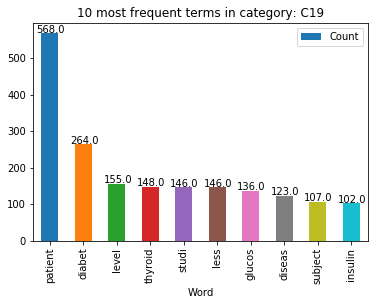

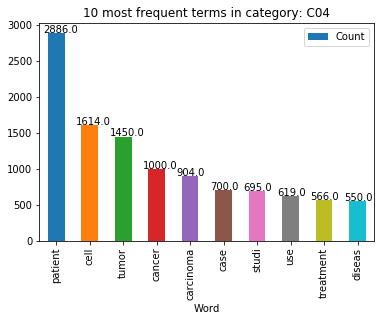

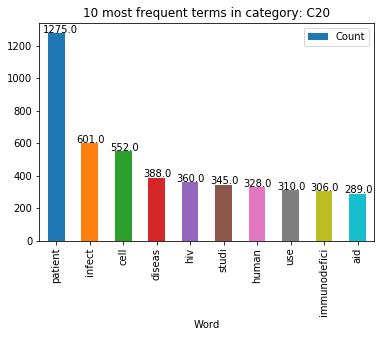

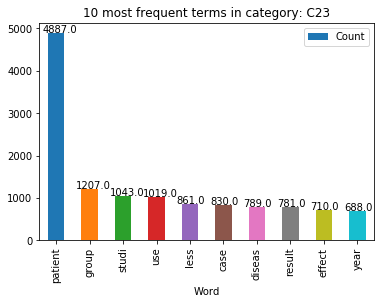

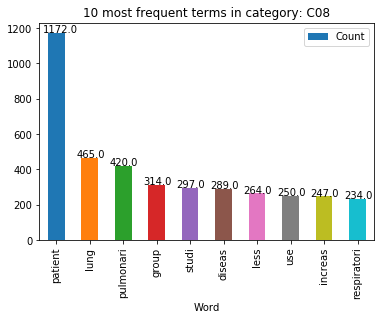

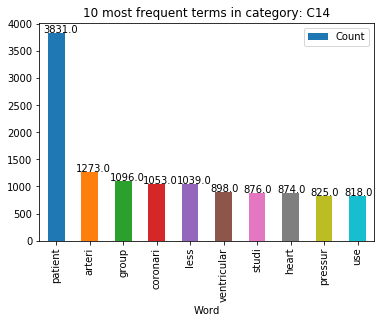

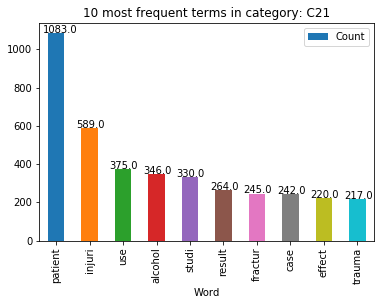

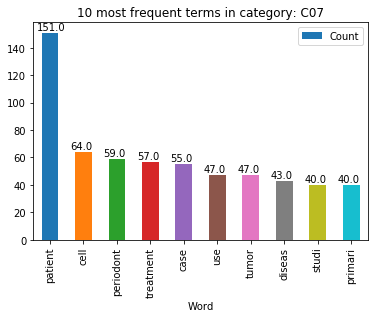

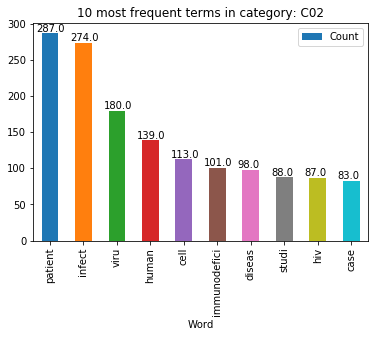

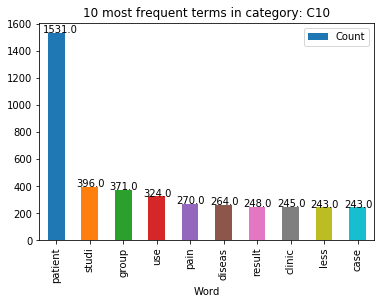

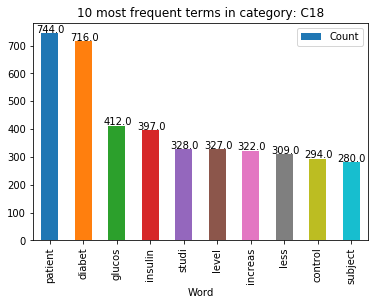

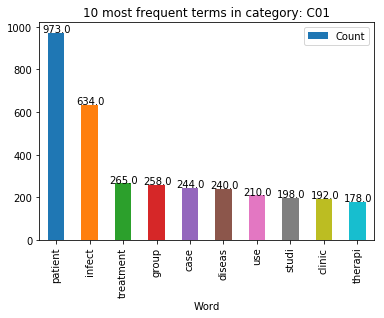

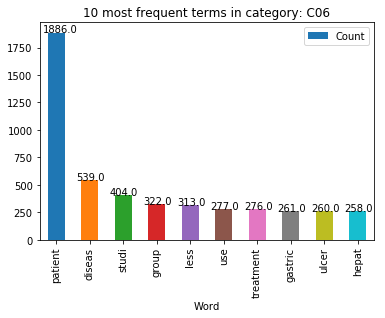

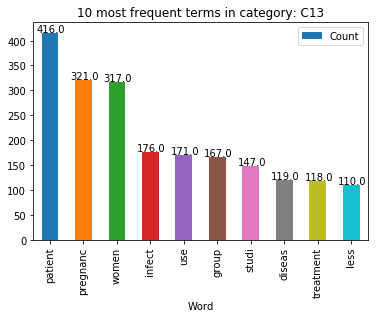

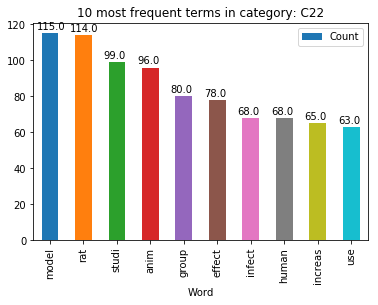

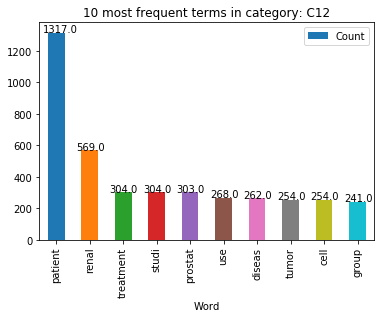

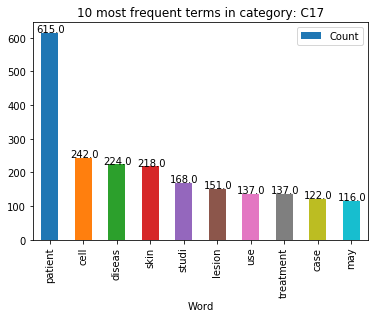

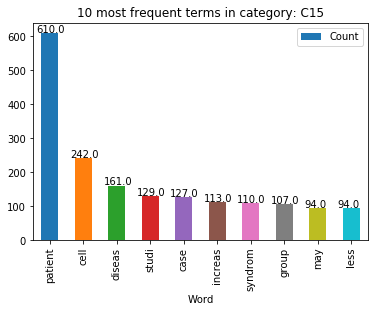

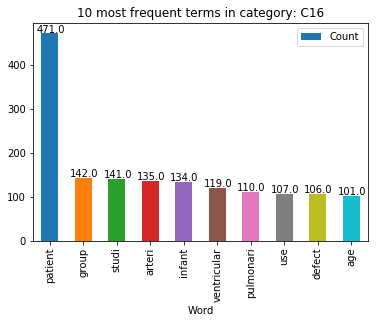

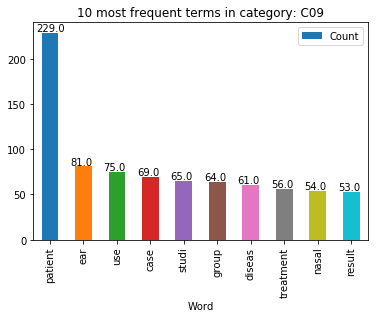

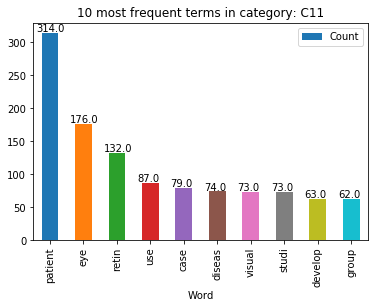

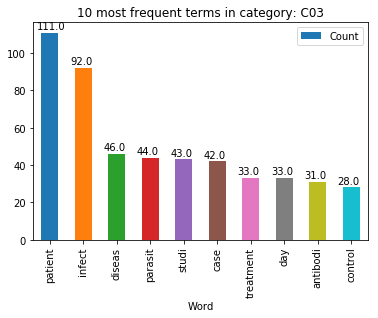

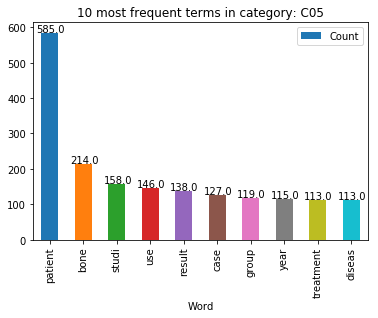

In [7]:

cleanData(dataSet)
makeTables(dataSet)

y_train, y_test = dataSet.target, data_test.target

In [9]:
# bag of words feature extraction:

vectorizer = CountVectorizer()
BOW_train = vectorizer.fit_transform(dataSet.data)

BOW_test = vectorizer.transform(data_test.data)


In [10]:
# TF-IDF feature extraction:

Tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')
#calculate TF-IDF of terms in documents
Tfidf_train = Tfidf_vectorizer.fit_transform(dataSet.data)
Tfidf_test = Tfidf_vectorizer.transform(data_test.data)

In [11]:
# Bi-gram feature extraction:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2),token_pattern=r'\b\w+\b', min_df=1)
nGrams_train = bigram_vectorizer.fit_transform(dataSet.data) #row- document, columns- term/pair (by index), cell- number of appearsense in document
nGrams_test = bigram_vectorizer.transform(data_test.data)

In [12]:
# evaluates how good the model is
def benchmark(clf, X_train, X_test): 
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time

In [13]:
# compare between the different machine learning evaluations
def makePlot (results):
    indices = np.arange(len(results))

    results = [[x[i] for x in results] for i in range(4)]

    clf_names, score, training_time, test_time = results
    training_time = np.array(training_time) / np.max(training_time)
    test_time = np.array(test_time) / np.max(test_time)

    plt.figure(figsize=(12, 8))
    plt.title("Score")
    plt.barh(indices, score, .2, label="score", color='navy')
    plt.barh(indices + .3, training_time, .2, label="training time",
             color='c')
    plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
    plt.yticks(())
    plt.legend(loc='best')
    plt.subplots_adjust(left=.25)
    plt.subplots_adjust(top=.95)
    plt.subplots_adjust(bottom=.05)

    for i, c in zip(indices, clf_names):
        plt.text(-.3, i, c)

    plt.show()

In [14]:
#evaluating the models for each of the ML:SVM,perceptron,Naive Bayes.
def compareMLanFeatuers():
    
   # 1) This evaluation is done using TF-DF feature extraction
   results_Tfidf = []
   for clf, name in (
           (SGDClassifier(),"SVM Tf-IDF"),
           (Perceptron(), "Perceptron Tf-IDF"),
           (MultinomialNB(),"Naive Bayes Tf-IDF")):
       print('-' * 80)
       print(name)
       results_Tfidf.append(benchmark(clf, Tfidf_train,Tfidf_test))
   makePlot (results_Tfidf) # display the comparison between of the ML's methods.
   
   # 2) This evaluation is done using bag of words feature extraction 
   results_BOW = []
   for clf, name in (
           (SGDClassifier(),"SVM Bag of Words"),
           (Perceptron(), "Perceptron Bag of Words"),
           (MultinomialNB(),"Naive Bayes Bag of Words")):
       print('=' * 80)
       print(name)
       results_BOW.append(benchmark(clf, BOW_train,BOW_test))
   makePlot (results_BOW)  #display the comparison between of the ML's methods. 
   
    # 3) This evaluation is done using N-gram feature extraction 
   results_nGram = []
   for clf, name in (
           (SGDClassifier(),"SVM n-gram"),
           (Perceptron(), "Perceptron n-gram"),
           (MultinomialNB(),"Naive Bayes n-gram")):
       print('=' * 80)
       print(name)
       results_nGram.append(benchmark(clf, nGrams_train,nGrams_test))
   makePlot (results_nGram)  #display the comparison between of the ML's methods.  

--------------------------------------------------------------------------------
SVM Tf-IDF
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


C:\Users\Estif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


train time: 0.953s
test time:  0.054s
accuracy:   0.441

--------------------------------------------------------------------------------
Perceptron Tf-IDF
________________________________________________________________________________
Training: 
Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)


C:\Users\Estif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


train time: 1.084s
test time:  0.048s
accuracy:   0.383

--------------------------------------------------------------------------------
Naive Bayes Tf-IDF
________________________________________________________________________________
Training: 
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
train time: 0.061s
test time:  0.053s
accuracy:   0.255



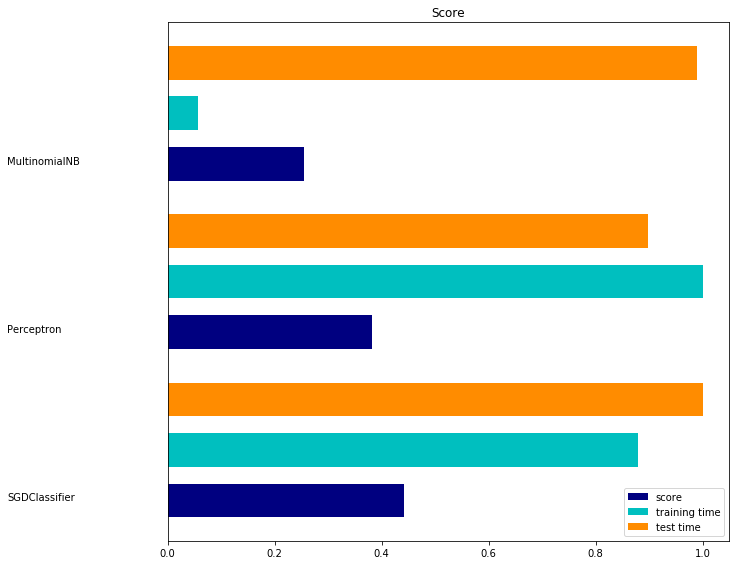

SVM Bag of Words
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


C:\Users\Estif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


train time: 0.651s
test time:  0.070s
accuracy:   0.350

Perceptron Bag of Words
________________________________________________________________________________
Training: 
Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)


C:\Users\Estif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


train time: 0.647s
test time:  0.066s
accuracy:   0.315

Naive Bayes Bag of Words
________________________________________________________________________________
Training: 
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
train time: 0.072s


test time:  0.066s
accuracy:   0.391



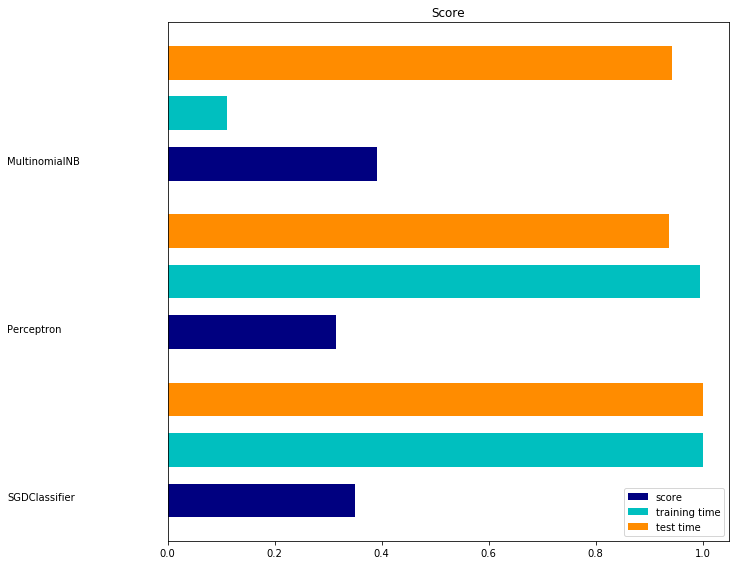

SVM n-gram
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


C:\Users\Estif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


train time: 3.226s


test time:  0.371s
accuracy:   0.314

Perceptron n-gram
________________________________________________________________________________
Training: 
Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)


C:\Users\Estif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


train time: 2.800s


test time:  0.358s
accuracy:   0.353

Naive Bayes n-gram
________________________________________________________________________________
Training: 
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


train time: 0.737s


test time:  0.353s
accuracy:   0.285



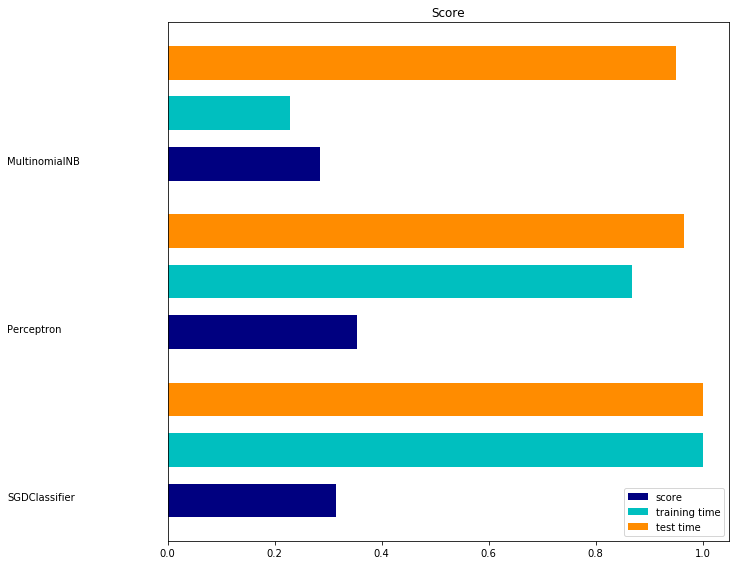

In [15]:
compareMLanFeatuers() # calls the function to compare the machine learning methods

In [22]:
# this function recieves 1 feature extraction and 1 machine learning method, 
# and performes a classification in order to optimize the results
def bestClassifier(featureExtraction, clf, methodResults,parameters_clf):
    categories=list(catTerms.keys())
    _clf = Pipeline([('vect', featureExtraction), ('clf', clf)])
    gs_clf = GridSearchCV(_clf, parameters_clf, n_jobs=1)
    gs_clf = gs_clf.fit(dataSet.data, dataSet.target)
    prediction=gs_clf.predict(data_test.data)
    acc=metrics.accuracy_score(categories,prediction)
    print('Best score: ',gs_clf.best_score_)
    print('Accuracy: ',acc)
    methodResults.append(gs_clf.best_score)
    print('Best params: ',gs_clf.best_params_)
    return methodResults



In [23]:
# take the best results of each of the machine learning methods
SVM_method_results = [] 
NB_method_results = []
PERCEPTRON_method_results = []


# SVM + bag of words
parameters_clf = {
    'vect__max_df': (0.3,0.5),
    'clf__alpha': (0.01,0.1),
}
SVM_method_results=bestClassifier(CountVectorizer(), SGDClassifier(),
                                  SVM_method_results, parameters_clf)
# SVM + td-idf
# parameters_clf = {
#  'vect__max_df': (0.3,0.5),
#  'vect__sublinear_tf':(True, False),
#  'clf__alpha': (0.001,0.0001,0.00001,0.000001),
#  'clf__penalty': ('elasticnet','none', 'l2','l1'),
#  'clf__epsilon':(0.1,0.2)
# }
SVM_method_results=bestClassifier(TfidfVectorizer(), SGDClassifier(),
                                  SVM_method_results, parameters_clf)
# Naive bayes + bag of words
# parameters_clf = {
#      'vect__max_df': (0.3, 0.5),
#      'clf__alpha': (0.01, 1.0),
#      'clf__fit_prior': (False, True)
# }
NB_method_results=bestClassifier(CountVectorizer(), MultinomialNB(),
                                  NB_method_results, parameters_clf)
# Naive bayes + td-idf
# parameters_clf = {
#      'vect__max_df': (0.3, 0.5),
#      'vect__sublinear_tf':(True, False),
#      'clf__alpha': (0.01, 1.0),
#      'clf__fit_prior':(False, True)
# }
NB_method_results = bestClassifier(TfidfVectorizer(), MultinomialNB(), 
                                NB_method_results, parameters_clf)
# neuron network (with one layer) + td-idf
# parameters_clf = {
#     'vect__max_df': (0.3, 0.5),
#     'vect__sublinear_tf':(True, False),
#     'clf__alpha': (0.001, 0.0001, 0.00001, 0.000001),
#     'clf__penalty': ('elasticnet', None, 'l1', 'l2')
# }
PERCEPTRON_method_results=bestClassifier(TfidfVectorizer(), Perceptron(), 
                                PERCEPTRON_method_results, parameters_clf)
# neuron network (with one layer) + bag of words
# parameters_clf = {
#     'vect__max_df': (0.3, 0.5),
#     'clf__alpha': (0.001, 0.0001, 0.00001, 0.000001),
#     'clf__penalty': ('elasticnet', None, 'l1', 'l2')
# }
PERCEPTRON_method_results=bestClassifier(CountVectorizer(), Perceptron(), 
                                PERCEPTRON_method_results, parameters_clf)


C:\Users\Estif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


C:\Users\Estif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


C:\Users\Estif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


C:\Users\Estif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


C:\Users\Estif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


C:\Users\Estif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


C:\Users\Estif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


C:\Users\Estif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


C:\Users\Estif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


C:\Users\Estif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


C:\Users\Estif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


C:\Users\Estif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


C:\Users\Estif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


ValueError: Found input variables with inconsistent numbers of samples: [23, 12733]

In [18]:

#Classification Evaluation

from sklearn.metrics import classification_report
def tableResults(X_train,X_test, clf, name):
        categories=list(catTerms.keys())
        clf.fit(X_train,y_train) 
        report = classification_report(y_test,  clf.predict(X_test), 
                                       target_names=categories)
        print(name)
        print(report)

In [19]:
# saves the evaluations of each machine learning method, with it's 
# optimal parameters values and chosen feature extraction 
evaluations = []
def evaluateOptimal(FE_with_params, clf_with_params, methods_names):
    featureExtraction = FE_with_params
    train = featureExtraction.fit_transform(dataSet.data) 
    test = featureExtraction.transform(data_test.data)
    clf_method = clf_with_params
    print(methods_names)
    evaluations.append(benchmark(clf_method, train, test))
    tableResults(train,test,clf_method,methods_names)

In [20]:
# with the optimal parameters/feature extraction, we will evaluate each of the 
# machine learning methods once again, in order to get better results

# running SVM with TF-IDF - optimal
FE_withparams = TfidfVectorizer(sublinear_tf='True', max_df=0.3, stop_words='english')
clf_with_params = SGDClassifier(penalty='l1', alpha=0.0001, epsilon=0.2)
evaluateOptimal(FE_withparams, clf_with_params,'SVM with TF-IDF')

# running Perceptron (Neuron network) with TF-IDF - optimal
FE_withparams = TfidfVectorizer(sublinear_tf=True, max_df=0.3, stop_words='english')
clf_with_params = Perceptron(penalty='l1',alpha= 0.0001)
evaluateOptimal(FE_withparams, clf_with_params,'Perceptron with TF-IDF')

# running Naive Bayes with bag of words - optimal
FE_withparams = CountVectorizer(max_df=0.3,min_df= 0, stop_words='english')
clf_with_params = MultinomialNB(fit_prior=False,alpha=1.0)
evaluateOptimal(FE_withparams, clf_with_params,'Naive Bayes with bag of words')








SVM with TF-IDF
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.2,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


C:\Users\Estif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


train time: 1.317s
test time:  0.058s
accuracy:   0.357



C:\Users\Estif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


C:\Users\Estif\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


SVM with TF-IDF
             precision    recall  f1-score   support

        C19       0.41      0.13      0.20       506
        C04       0.35      0.03      0.06       233
        C20       0.52      0.23      0.32        70
        C23       0.45      0.73      0.56      1467
        C08       0.41      0.24      0.31       429
        C14       0.47      0.32      0.38       632
        C21       0.20      0.13      0.16       146
        C07       0.39      0.26      0.31       600
        C02       0.33      0.02      0.03       129
        C10       0.48      0.18      0.26       941
        C18       0.04      0.67      0.08       202
        C01       0.43      0.32      0.37       548
        C06       0.46      0.22      0.30       386
        C13       0.48      0.78      0.59      1301
        C22       0.41      0.22      0.28       320
        C12       0.28      0.08      0.12       228
        C17       0.49      0.28      0.36       348
        C15       0.43      0

Perceptron with TF-IDF
________________________________________________________________________________
Training: 
Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty='l1', random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)


C:\Users\Estif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


train time: 1.242s
test time:  0.065s
accuracy:   0.280



C:\Users\Estif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Perceptron with TF-IDF
             precision    recall  f1-score   support

        C19       0.07      0.47      0.13       506
        C04       0.42      0.02      0.04       233
        C20       0.65      0.19      0.29        70
        C23       0.45      0.40      0.43      1467
        C08       0.50      0.01      0.02       429
        C14       0.39      0.21      0.27       632
        C21       0.37      0.18      0.24       146
        C07       0.37      0.44      0.40       600
        C02       0.36      0.19      0.25       129
        C10       0.29      0.34      0.31       941
        C18       0.38      0.30      0.34       202
        C01       0.48      0.04      0.07       548
        C06       0.30      0.29      0.30       386
        C13       0.52      0.46      0.49      1301
        C22       0.25      0.01      0.02       320
        C12       0.17      0.29      0.22       228
        C17       0.45      0.16      0.24       348
        C15       0.23

Naive Bayes with bag of words
________________________________________________________________________________
Training: 
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False)
train time: 0.088s
test time:  0.055s
accuracy:   0.409



Naive Bayes with bag of words
             precision    recall  f1-score   support

        C19       0.35      0.41      0.38       506
        C04       0.44      0.03      0.06       233
        C20       0.67      0.06      0.11        70
        C23       0.45      0.72      0.56      1467
        C08       0.44      0.30      0.36       429
        C14       0.44      0.48      0.46       632
        C21       0.25      0.01      0.03       146
        C07       0.41      0.28      0.33       600
        C02       0.40      0.05      0.08       129
        C10       0.43      0.44      0.44       941
        C18       0.45      0.24      0.31       202
        C01       0.52      0.32      0.40       548
        C06       0.45      0.28      0.35       386
        C13       0.50      0.70      0.58      1301
        C22       0.41      0.15      0.22       320
        C12       0.28      0.09      0.13       228
        C17       0.48      0.28      0.35       348
        C15    